In [16]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import re
import warnings
warnings.filterwarnings("ignore")

In [17]:
#!pwd ### print working directories
%cd /content/drive/MyDrive/Colab Notebook/Draft    #change directories
#!ls # list directory contents

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Colab Notebook/Draft #change directories'
C:\Users\USER\Documents\Geospatial Projects\DSN Geospatial\NLP


In [18]:
%cd /content/drive/MyDrive/Colab Notebook/Draft

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Colab Notebook/Draft'
C:\Users\USER\Documents\Geospatial Projects\DSN Geospatial\NLP


In [19]:
data = pd.read_csv('data/bbc-text.csv')

In [20]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


## Undertanding Features and Targets Variables

In [21]:
data['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [22]:
data.shape

(2225, 2)

In [23]:
data.dtypes

category    object
text        object
dtype: object

## Checking for null values

In [24]:
data.isnull().any()

category    False
text        False
dtype: bool

## Countplot of Target Variable(Category)

In [25]:
data['category'].value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

<Axes: xlabel='category', ylabel='count'>

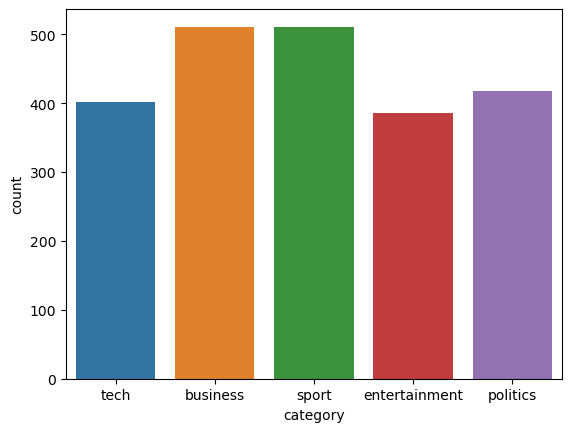

In [26]:
sns.countplot(data=data, x='category')

In [27]:
data['news_length'] = data['text'].str.len()
data['news_length']

0       4333
1       1842
2       1342
3       2176
4       1579
        ... 
2220    1745
2221     955
2222    1648
2223    4684
2224    1167
Name: news_length, Length: 2225, dtype: int64

### Distribution Plot

Text(0.5, 1.0, 'News Length Distribution')

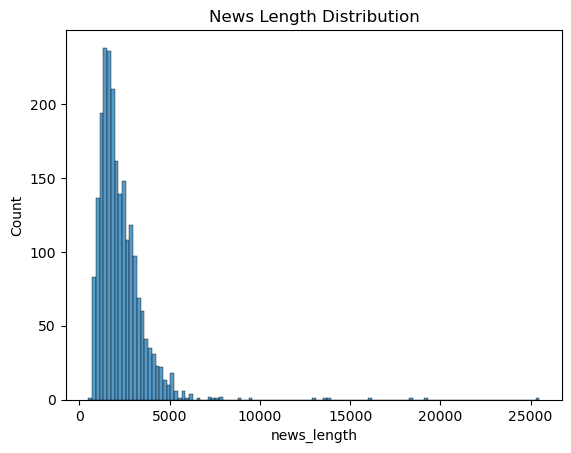

In [28]:
sns.histplot(data['news_length']).set_title('News Length Distribution')

## WordCloud

In [29]:
def create_wordcloud(words):
  wordcloud = WordCloud(width=800, height=500, random_state=21,
                        max_font_size=110).generate(words)
  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

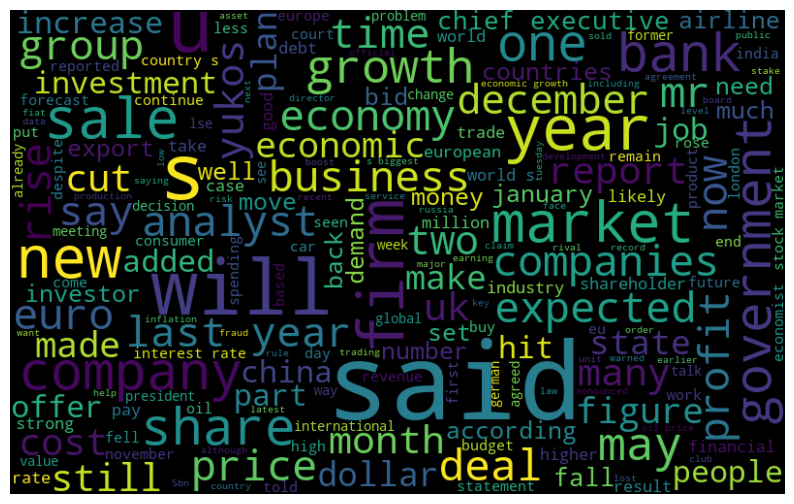

In [30]:
subset = data[data.category=='business']  ## subset the data to business category
text = subset.text.values
words = ' '.join(text)
create_wordcloud(words)

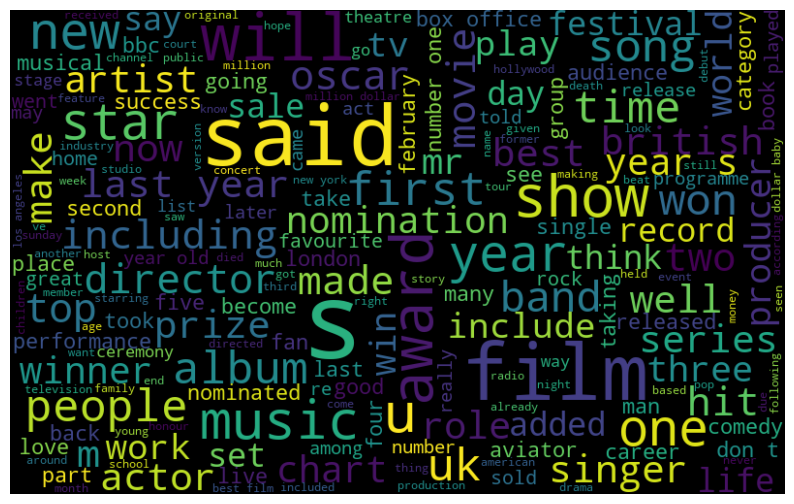

In [31]:
subset = data[data.category=='entertainment']
text = subset.text.values
words = ' '.join(text)
create_wordcloud(words)

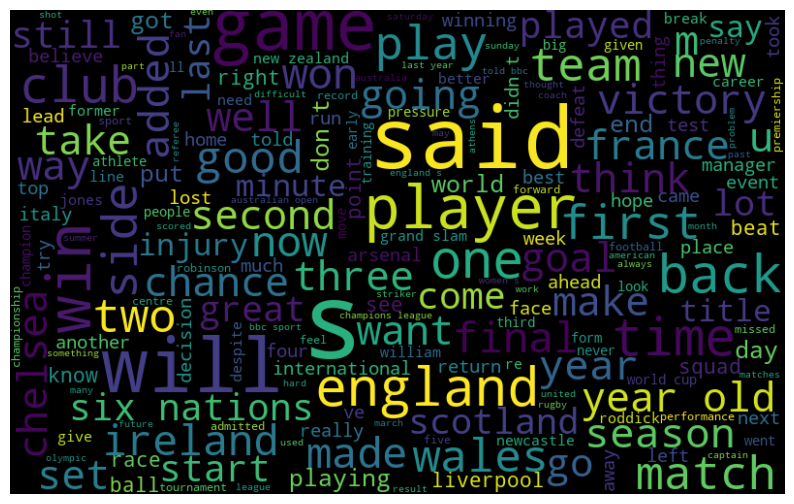

In [32]:
subset = data[data.category=='sport']
text = subset.text.values
words = ' '.join(text)
create_wordcloud(words)

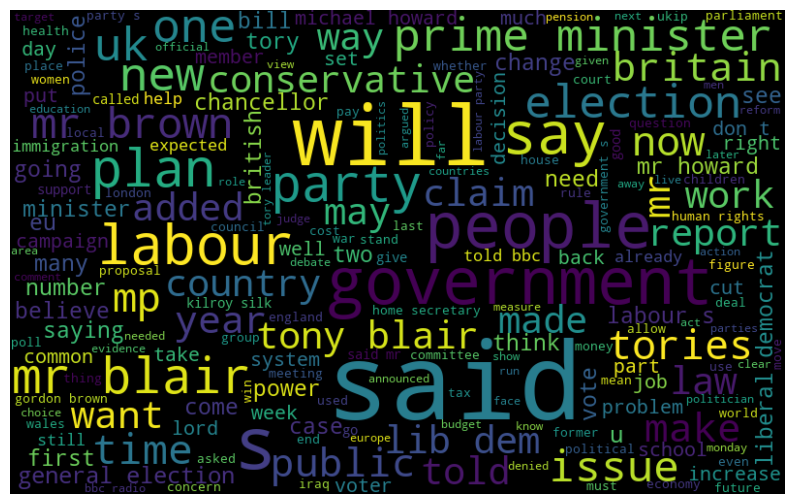

In [33]:
subset = data[data.category=='politics']
text = subset.text.values
words = ' '.join(text)
create_wordcloud(words)

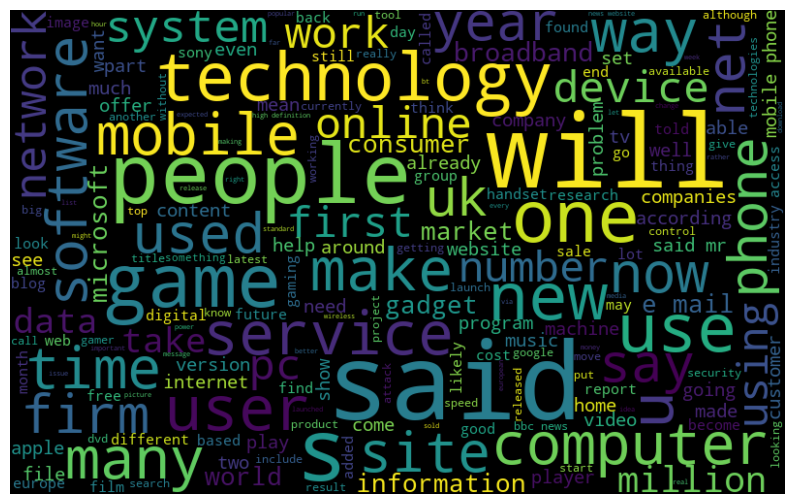

In [34]:
subset = data[data.category=='tech']
text = subset.text.values
words = ' '.join(text)
create_wordcloud(words)

## Cleaning Data

In [35]:
def process_text(text):
  text = text.lower().replace('\n',' ').replace('\r','').strip()
  text = re.sub(' +',' ', text)
  text = re.sub(r'[^\w\s]','',text)

  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence  = [w for w in word_tokens if not w in stop_words]


  # filtered_sentence = []
  # for w in word_tokens:
  #   if w not in stop_words:
  #     filtered_sentence.append(w)

  text = ' '.join(filtered_sentence)
  return text

In [36]:
data['text_parsed'] = data['text'].apply(process_text)

In [37]:
data.head()

,category,text,news_length,text_parsed
0,tech,tv future in the hands of viewers with home th...,4333,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,1842,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,1342,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,2176,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,ocean twelve raids box office ocean twelve cri...


## Label Encoding

In [38]:
label_encoder = preprocessing.LabelEncoder()
data['category_target'] = label_encoder.fit_transform(data['category'])

In [39]:
data.head()

,category,text,news_length,text_parsed,category_target
0,tech,tv future in the hands of viewers with home th...,4333,tv future hands viewers home theatre systems p...,4
1,business,worldcom boss left books alone former worldc...,1842,worldcom boss left books alone former worldcom...,0
2,sport,tigers wary of farrell gamble leicester say ...,1342,tigers wary farrell gamble leicester say rushe...,3
3,sport,yeading face newcastle in fa cup premiership s...,2176,yeading face newcastle fa cup premiership side...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,ocean twelve raids box office ocean twelve cri...,1


In [40]:
data.to_csv('data/BBC_News_Preprocessed.csv')

## Split the data into Training and Testing

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data['text_parsed'],data['category_target'],
                                                    test_size = 0.2, random_state=8)

In [42]:
X_train.shape

(1780,)

In [43]:
X_test.shape

(445,)

In [44]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [45]:
tfidf = TfidfVectorizer(encoding = 'utf-8',
                        ngram_range = ngram_range,
                        stop_words = None,
                        lowercase = False,
                        max_df = max_df,
                        min_df = min_df,
                        max_features = max_features,
                        norm = 'l2',
                        sublinear_tf = True)

features_train  = tfidf.fit_transform(X_train).toarray()
labels_train = y_train

features_test  = tfidf.transform(X_test).toarray()
labels_test = y_test

In [46]:
labels_train.shape

(1780,)

In [47]:
labels_test.shape

(445,)

In [48]:
features_train.shape

(1780, 300)

In [49]:
features_test.shape

(445, 300)

# Building Models

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy 0.9438202247191011
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       105
           1       0.94      0.93      0.93        85
           2       0.93      0.91      0.92        77
           3       0.97      0.95      0.96       102
           4       0.97      0.97      0.97        76

    accuracy                           0.94       445
   macro avg       0.95      0.94      0.94       445
weighted avg       0.94      0.94      0.94       445



In [51]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

## Hyper Parameter Tuning (Random Forest)

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5,8,15,25,30]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

hyperF = dict(n_estimators = n_estimators, max_depth =max_depth,
              min_samples_split = min_samples_split,
              min_samples_leaf = min_samples_leaf)

hyperF

{'n_estimators': [100, 300, 500, 800, 1200],
 'max_depth': [5, 8, 15, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [54]:
model = RandomForestClassifier()
gridF = GridSearchCV(model, hyperF, cv=3, verbose=1, n_jobs=-1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [55]:
bestF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1, max_depth=30,
                              min_samples_leaf=1, min_samples_split=2,
                              n_estimators=1200)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.946067415730337
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       105
           1       0.95      0.94      0.95        85
           2       0.92      0.92      0.92        77
           3       0.95      0.95      0.95       102
           4       0.99      0.97      0.98        76

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445



## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy 0.9617977528089887
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.99      0.96      0.98        85
           2       0.95      0.95      0.95        77
           3       0.97      0.99      0.98       102
           4       0.97      0.96      0.97        76

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



In [58]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Hyper Parameter Tuning (Logistic Regression)

In [59]:
param_grid = {'C': [0.1, 0.001,1], # Create list of options for the regularization penalty
              'penalty': ['l1', 'l2']} 
model = LogisticRegression()
clf = GridSearchCV(model, param_grid, cv=3, verbose=1)

bestF = clf.fit(features_train, labels_train)
bestF.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


{'C': 1, 'penalty': 'l2'}

In [60]:
model = LogisticRegression(C=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9617977528089887
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.99      0.96      0.98        85
           2       0.95      0.95      0.95        77
           3       0.97      0.99      0.98       102
           4       0.97      0.96      0.97        76

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



## KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier ##KNN

model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy 0.9550561797752809
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       105
           1       0.95      0.95      0.95        85
           2       0.97      0.96      0.97        77
           3       0.99      0.93      0.96       102
           4       0.95      0.97      0.96        76

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



In [62]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## Hyper Parameter Tuning (KNeighborsClassifier)

In [63]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1,2,3,4,5,6,7], 'p': [1,2,3,4,5]}

model = KNeighborsClassifier()
gridF = GridSearchCV(model, params_KNN, cv=3, verbose=1,
                    n_jobs=-1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


In [64]:
bestF.best_params_

{'n_neighbors': 3, 'p': 2}

In [65]:
model = KNeighborsClassifier(n_neighbors=5 , p=2)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9550561797752809
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       105
           1       0.95      0.95      0.95        85
           2       0.97      0.96      0.97        77
           3       0.99      0.93      0.96       102
           4       0.95      0.97      0.96        76

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



## Decision Tree

In [67]:
model = DecisionTreeClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy 0.8404494382022472
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       105
           1       0.84      0.86      0.85        85
           2       0.81      0.78      0.79        77
           3       0.88      0.90      0.89       102
           4       0.89      0.83      0.86        76

    accuracy                           0.84       445
   macro avg       0.84      0.84      0.84       445
weighted avg       0.84      0.84      0.84       445



In [68]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

## Hyper Parameter Tuning (Decision Tree)

In [69]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

main_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]

hyperF = dict(max_depth=max_depth, criterion=criterion,
             min_samples_leaf=min_samples_leaf)

model = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv=3, verbose=1)
bestF = gridF.fit(features_train, labels_trains)

NameError: name 'labels_trains' is not defined

In [70]:
bestF.best_params_

{'n_neighbors': 3, 'p': 2}

In [71]:
model = DecisionTreeClassifier(random_state=1, criterion='entropy', 
                              max_depth=None, min_samples_leaf=6)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8224719101123595
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       105
           1       0.86      0.85      0.85        85
           2       0.78      0.86      0.81        77
           3       0.89      0.87      0.88       102
           4       0.84      0.82      0.83        76

    accuracy                           0.82       445
   macro avg       0.82      0.83      0.82       445
weighted avg       0.82      0.82      0.82       445



## Gaussian NaiveBayes

In [72]:
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy 0.9101123595505618
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       105
           1       0.93      0.81      0.87        85
           2       0.92      0.94      0.93        77
           3       0.93      0.95      0.94       102
           4       0.84      0.96      0.90        76

    accuracy                           0.91       445
   macro avg       0.91      0.91      0.91       445
weighted avg       0.91      0.91      0.91       445



## Hyper Parameter Tuning (Naive Bayes)